# Boosting & XGBoost

## Boosting
### Boosting의 정의  
- 약 분류기를 순차적(Sequential)으로 학습하는 앙상블 기법  
- 예측을 반복하면서 잘못 예측한 데이터에 가중치를 부여해서 오류를 개선

### Bagging
무작위 복원 추출로 부트스트랩 샘플을 추출  

### Boosting
부트스트랩 샘플을 추출하는 과정에서 각 자료에 동일한 확률을 부여하는 것이 아니라 분류가 잘못된 데이터에 더 큰 가중을 주어 표본을 추출

### Boosting 종류
1. AdaBoost
2. Gradien Boost
3. XGBoost

## AdaBoost
= Adaptive Boosting의 약자  
- 간단한 약 분류기들이 상호 보완하도록 순차적으로 학습  
- 과소적합된 학습 데이터의 가중치를 높이면서(Adaptive) 새로 학습된 모델이 학습하기 어려운 데이터에 더 잘 적합되도록 하는 방식

### 약 분류기  
AdaBoost에서 사용하는 분류기는 if문 하나와 변수 하나 정도의 얕은 깊이의 Tree 구조를 이용  
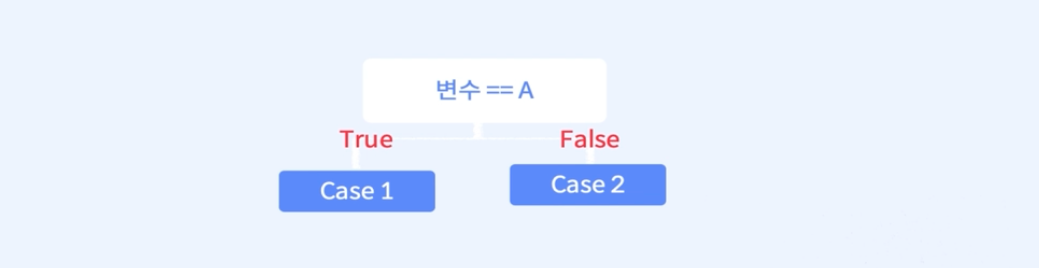

### AdaBoost 학습 방법  
1. 전체 학습 데이터를 이용해 모델 생성
2. 잘못 예측된 데이터의 가중치를 상대적으로 높여줌
3. 가중치를 반영하여 다음 모델을 학습
4. 2~3번 과정을 반복  

#### 1단계: 전체 학습 데이터를 이용해 모델을 생성  
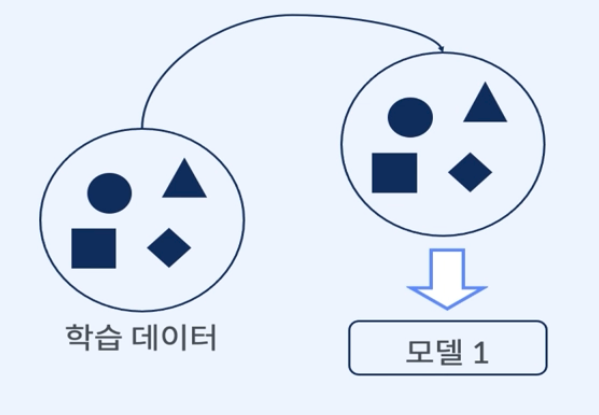

#### 2단계: 잘못 예측된 데이터의 가중치를 상대적으로 높여줌  
- 잘못 예측된 데이터의 새로운 가중치 = 가중치 * exp($\alpha$)
- 잘 예측된 데이터의 새로운 가중치 = 가중치 * exp($-\alpha$)

$\alpha(신뢰도) = {1\over2} * log({1-e\over e})$  
$e(에러율) = {오류 데이터의 가중치 합 \over 전체 데이터 가중치 합}$

**예시**  
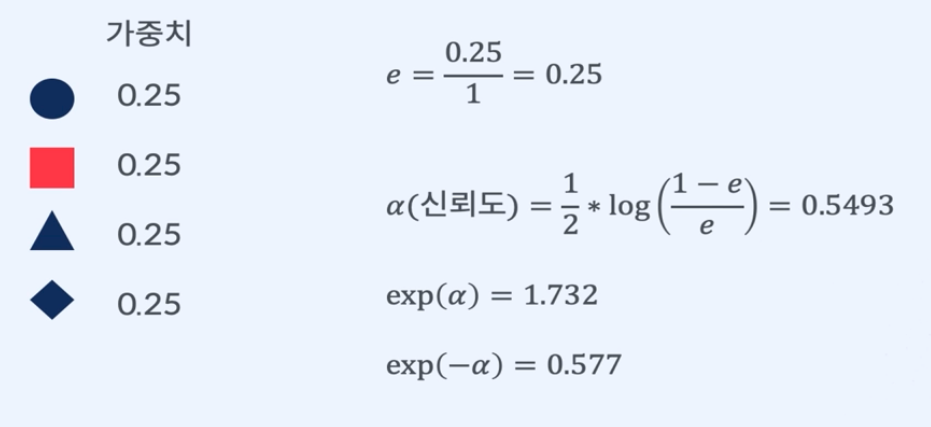  
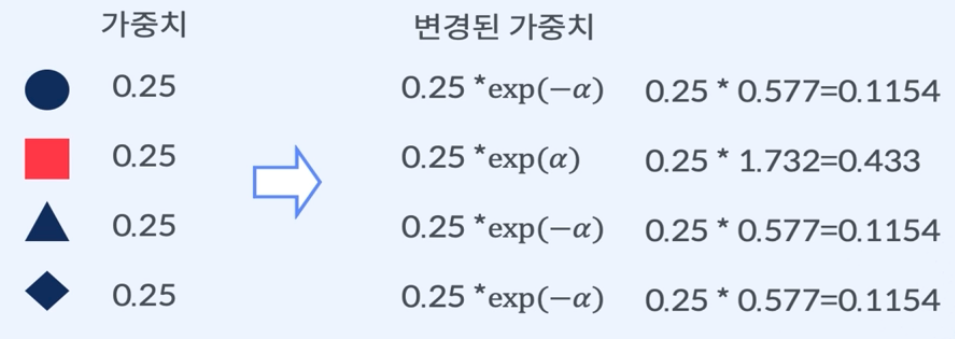

#### 3단계: 가중치를 반영하여 다음 모델을 학습  
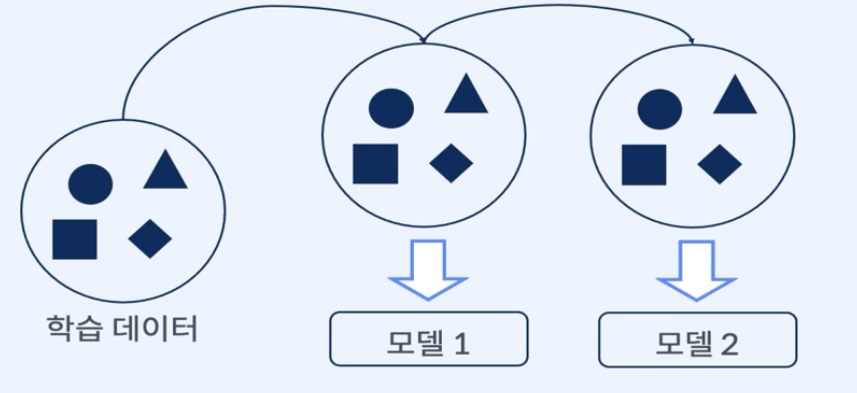

#### 4단계: 2~3단계를 반복  
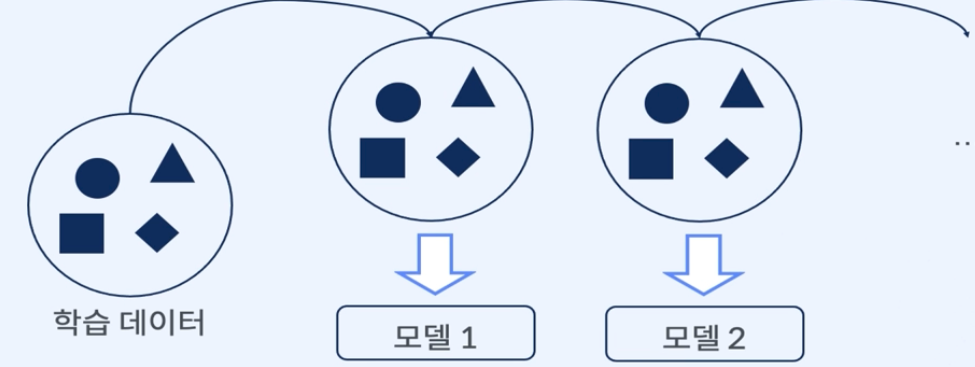

#### 모델의 신뢰도  
AdaBoost로 생성되는 각 모델은 가중치를 바꿀 때 사용한 신뢰도가 모델마다 사용됨  
신뢰도는 예측을 할 때도 사용되는데, 모델별로 신뢰도를 반영하여 Voting을 하게 됨  
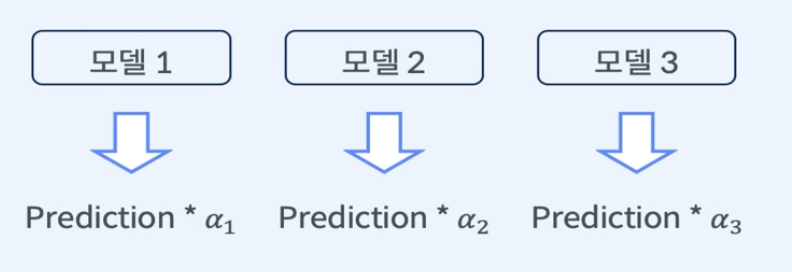


## Gradient Boost
- 학습 전 단계 모델에서의 잔여 오차(Residual error)에 대해 새로운 모델을 학습  
- 잔여 오차를 예측하여 발전하는 약분류기  
- 현재까지 학습된 분류기의 약점을 Gradient를 통해 알려주고 이를 중점으로 보완하는 방식  

### Gradient Boost 학습 방법  
1. 모델을 학습 후 예측값을 계산  
2. 잔여 오차를 계산
3. 잔여 오차를 예측하는 트리 모델을 생성  
4. Learning Rate를 이용해 기존 예측값을 수정  
5. 2~4를 반복  

### 예시   

|키|성별|몸무게|
|---|---|---|
|168|남자|70|
|175|남자|85|
|163|여자|53|
|159|여자|50|
|180|남자|90|
|177|남자|86|  

#### 1단계: 모델을 학습 후 예측값을 계산  
예제에서 최초 모델을 몸무게의 평균으로 생성  
평균 = 72.3  

|키|성별|몸무게|예측|
|---|---|---|---|
|168|남자|70|72.3|
|175|남자|85|72.3|
|163|여자|53|72.3|
|159|여자|50|72.3|
|180|남자|90|72.3|
|177|남자|86|72.3|  

### 2단계: 잔여 오차를 계산

|키|성별|몸무게|예측|
|---|---|---|---|
|168|남자|70|72.3|-2.3|
|175|남자|85|72.3|12.7|
|163|여자|53|72.3|-19.3|
|159|여자|50|72.3|-22.3|
|180|남자|90|72.3|17.7|
|177|남자|86|72.3|13.7|  


#### 3단계: 잔여 오차를 예측하는 트리 모델을 생성  
1. 성별이 남자가 아닐 때의 잔여 오차  
2. 성별이 남자이면서 키가 176 미만인 사람에 대한 잔여 오차  
3. 남자이면서 키가 176 이상인 사람에 대한 잔여 오차  

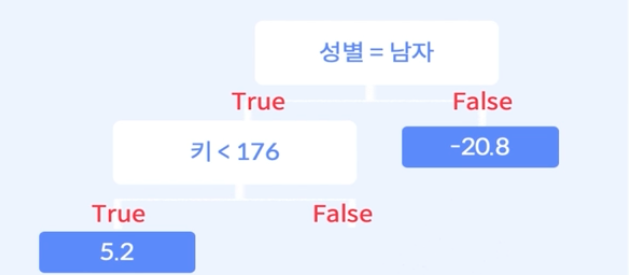

#### 4단계: Learning Rate를 이용해 기존 예측값을 수정  
특성에 맞게 예측된 잔여 오차  

|키|성별|몸무게|예측|예측된 잔여 오차|
|---|---|---|---|---|
|168|남자|70|72.3|-2.3|5.2|
|175|남자|85|72.3|12.7|5.2|
|163|여자|53|72.3|-19.3|-20.8|
|159|여자|50|72.3|-22.3|-20.8|
|180|남자|90|72.3|17.7|14.7|
|177|남자|86|72.3|13.7|14.7|   

Learning Rate = 0.5

|Learning Rate * 예측된 잔여 오차|예측값 수정|
|---|---|   
|0.5*5.2=2.6|72.3+2.6=74.9|
|0.5*5.2=2.6|72.3+2.6=74.9|
|0.5*(-20.8)=-10.4|72.3-10.4=61.9|
|0.5*(-20.8)=-10.4|72.3-10.4=61.9|
|0.5*14.7=7.35|72.3+7.35=79.65|
|0.5*14.7=7.35|72.3+7.35=79.65|

#### 5단계: 2~4단계를 반복

### Gradient Boost 예측
최초 모델의 예측값에 생성된 잔여 오차 예측 모델의 오차 예측값을 더함  

## XGBoost
- Gradient Boosting 기반의 모델
- 트리를 만들 때 병렬 처리를 가능하게 하서 Gradient Boosting의 속도를 개선  

### XGBoost의 특징  
1. 병렬 / 분산 처리가 가능
2. split 지점을 고려할 때 일부를 보고 결정  
3. Sparsity Awareness


#### 병렬 / 분산 처리  
CPU 병렬 처리가 가능  
코어들이 각자 할당받은 변수들로 제각기 가지를 쳐 나감  
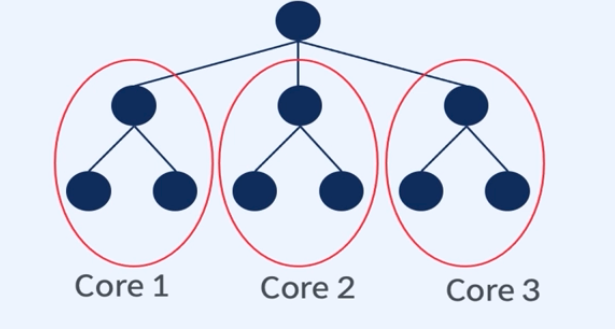

#### Split 지점을 고려할 때 일부를 보고 결정  
연속형 변수들의 split 지점을 고려할 때 일부분만 보고 고려하여 속도를 빠르게 함  
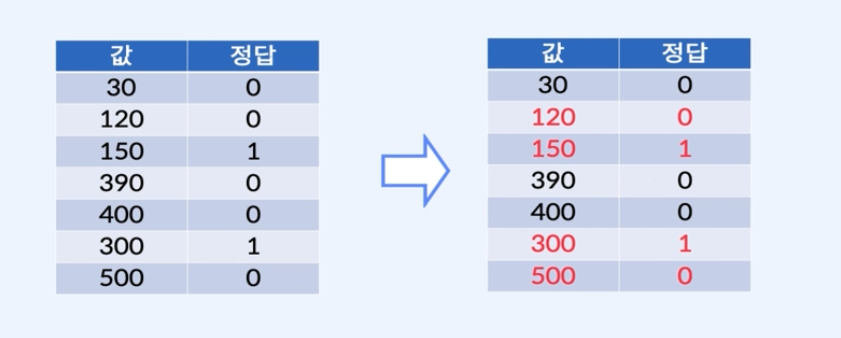

#### Sparsity Awareness  
값이 0인 데이터는 건너뛰며 학습을 진행  
범주형 변수를 dummy화 시킬 경우 학습 속도를 빠르게 할 수 있음  

**범주형 변수의 dummy화**  
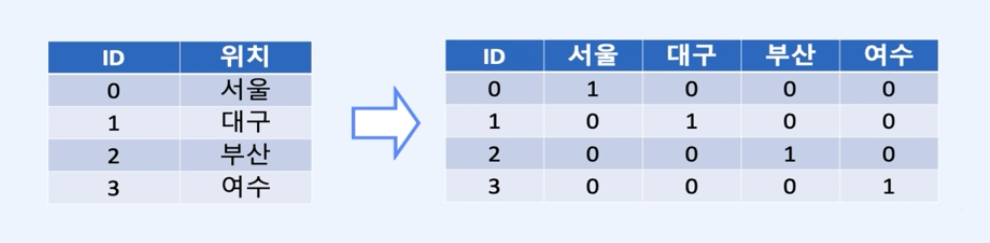  
위의 표처럼 정보를 0~3으로 변환하는 것이 아니라 각 변수의 유무의 여부로 0 또는 1로 바꾸는 것을 의미  